In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal

In [ ]:
file = 'Profile8.rd3'

In [ ]:
class GprProfile():
  def __init__(self, file) -> None:
    self.import_data(file)
    self.twtt = np.linspace(0, float(self.info["TIMEWINDOW"]), int(self.info["SAMPLES"]))
    #print(self.twtt.shape)
    self.profilePos = float(self.info["DISTANCE INTERVAL"]) * np.arange(0, self.data.shape[1])
    #print(self.profilePos.shape)


  def import_data(self, file):
    file_name, file_ext = os.path.splitext(file)
    self.data, self.info = self.read_mala(file_name)
  

  def read_mala(self, file_name):
    info = {}
    with open(file_name+'.rad') as f:
      for line in f:
        parameter = line.split(':')
        info[parameter[0]] = parameter[1].rstrip()

    data_filename = file_name + '.rd3'
    data = np.fromfile(data_filename, dtype= np.int16)
    #print(data.shape)
    n_row  = int(len(data) / int(info['SAMPLES']))
    data = (np.asmatrix(data.reshape(n_row, int(info['SAMPLES'])))).transpose()
    #print(data.shape)

    return data, info

  def show_ascan(self):
    trace = int(self.data.shape[1]/2) 
    a_scan = np.asarray(self.data[:,trace])
    print(a_scan.shape)

    plt.scatter(a_scan, np.arange(int(self.info['SAMPLES'])), marker='.', c=a_scan,vmin=min(a_scan), vmax=max(a_scan), linewidths=0.1)
    plt.scatter(a_scan, np.arange(int(self.info["SAMPLES"])), marker='.', 
                    c=a_scan, cmap='magma',
                    vmin=min(a_scan), vmax=max(a_scan), 
                    linewidths=0.1)
    plt.plot(a_scan, np.arange(int(self.info["SAMPLES"])), linewidth=0.5)
    plt.gca().set_ylabel("sample number")
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show(block=True)

  def show_profile2(self):
 
        contrast = 6
 
        dx = float(self.info["DISTANCE INTERVAL"])
        dt = self.twtt[6] - self.twtt[5]
        stdcont = np.nanmax(np.abs(self.data)[:])
 
        print(stdcont)
 
        max_amp = np.matrix.max(abs(self.data))
 
        print(max_amp)
 
        plt.imshow(self.data, cmap='magma', extent=[min(self.profilePos),
                                                    max(self.profilePos),
                                                    max(self.twtt),
                                                    min(self.twtt)],
        aspect = "auto", vmin = -stdcont / contrast, vmax = stdcont / contrast)
        plt.gca().set_ylabel("two-way travel time [ns]")
 
        yrng = [np.max(self.twtt), np.min(self.twtt)]
        xrng = [min(self.profilePos), max(self.profilePos)]
 
        plt.ylim(yrng)
        plt.xlim(xrng)

        plt.gca().set_xlabel("profile position [m]")
        plt.gca().xaxis.tick_top()
        plt.gca().xaxis.set_label_position('top')
        plt.colorbar()
        plt.show()
  
  def dewow2(self, window):
    totsamps = self.data.shape[0]
    if (window >= totsamps):
        newdata = self.data-np.matrix.mean(self.data,0)            
    else:
        newdata = np.asmatrix(np.zeros(self.data.shape))
        halfwid = int(np.ceil(window/2.0))
        
        avgsmp=np.matrix.mean(self.data[0:halfwid+1,:],0)
        newdata[0:halfwid+1,:] = self.data[0:halfwid+1,:]-avgsmp

        for smp in range(halfwid,totsamps-halfwid+1):
            winstart = int(smp - halfwid)
            winend = int(smp + halfwid)
            avgsmp = np.matrix.mean(self.data[winstart:winend+1,:],0)
            newdata[smp,:] = self.data[smp,:]-avgsmp

        avgsmp = np.matrix.mean(self.data[totsamps-halfwid:totsamps+1,:],0)
        newdata[totsamps-halfwid:totsamps+1,:] = self.data[totsamps-halfwid:totsamps+1,:]-avgsmp
        contrast = 6
        stdcont = np.nanmax(np.abs(self.data)[:])
        return plt.imshow(newdata, cmap='magma', extent=[min(self.profilePos),
                                                    max(self.profilePos),
                                                    max(self.twtt),
                                                    min(self.twtt)],
        aspect = "auto", vmin = -stdcont / contrast, vmax = stdcont / contrast)
  
  def bandpass(self, lowcut, highcut):
    newdata = np.asmatrix(np.zeros(self.data.shape))
    fs = float(self.info["FREQUENCY"])
    # Create a Butterworth bandpass filter
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(3, [low, high], btype='band')
    for smp in range(self.data.shape[1]):
      signal = (self.data[:, smp])
      filtered_signal = lfilter(b, a, signal)
      newdata[:, smp] = filtered_signal
    #Generate plot
    contrast = 6
    dx = float(self.info["DISTANCE INTERVAL"])
    dt = self.twtt[6] - self.twtt[5]
    stdcont = np.nanmax(np.abs(newdata)[:])
    max_amp = np.matrix.max(abs(newdata))
    plt.imshow(newdata, cmap='magma', extent=[min(self.profilePos),
                                                    max(self.profilePos),
                                                    max(self.twtt),
                                                    min(self.twtt)],
        aspect = "auto", vmin = -stdcont / contrast, vmax = stdcont / contrast)


In [ ]:
profile1 = GprProfile(file)

0.009574417293292644


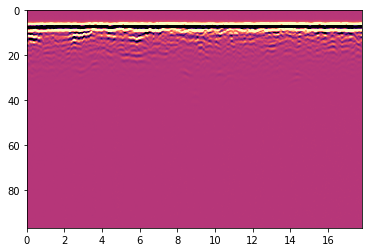

In [ ]:
profile1.bandpass(10,150)

(517, 1)


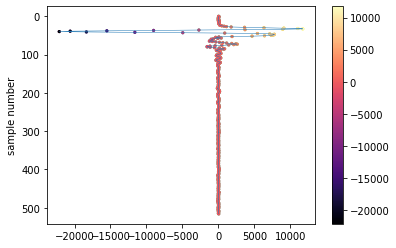

None


In [ ]:
print(profile1.show_ascan())

29791
29791


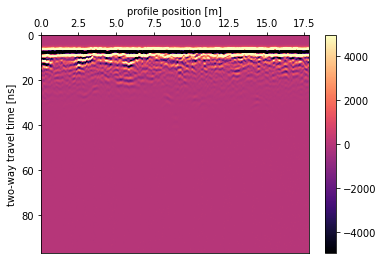

In [ ]:
profile1.show_profile2()

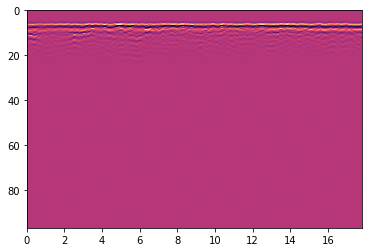

In [ ]:
profile1.dewow2(window = 3)

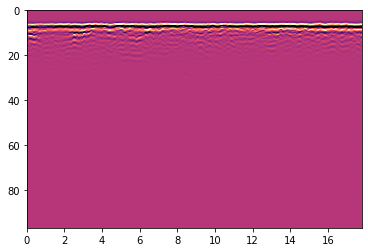

In [ ]:
profile1.dewow2(window = 5)

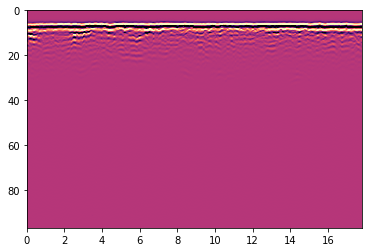

In [ ]:
profile1.dewow2(window = 7)